In [ ]:
#importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/cardio.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PatientID                1598 non-null   float64
 1   Age                      1598 non-null   int64  
 2   Sex                      1598 non-null   int64  
 3   Chest pain type          1598 non-null   int64  
 4   BP                       1598 non-null   int64  
 5   Cholesterol              1598 non-null   int64  
 6   FBS over 120             1598 non-null   int64  
 7   EKG results              1598 non-null   int64  
 8   Max HR                   1598 non-null   int64  
 9   Exercise angina          1598 non-null   int64  
 10  ST depression            1598 non-null   float64
 11  oldpeak                  1598 non-null   float64
 12  Slope of ST              1598 non-null   int64  
 13  Number of vessels fluro  1598 non-null   int64  
 14  Thallium                

In [ ]:
df.columns = df.columns.str.replace(' ', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientID             1598 non-null   float64
 1   Age                   1598 non-null   int64  
 2   Sex                   1598 non-null   int64  
 3   Chestpaintype         1598 non-null   int64  
 4   BP                    1598 non-null   int64  
 5   Cholesterol           1598 non-null   int64  
 6   FBSover120            1598 non-null   int64  
 7   EKGresults            1598 non-null   int64  
 8   MaxHR                 1598 non-null   int64  
 9   Exerciseangina        1598 non-null   int64  
 10  STdepression          1598 non-null   float64
 11  oldpeak               1598 non-null   float64
 12  SlopeofST             1598 non-null   int64  
 13  Numberofvesselsfluro  1598 non-null   int64  
 14  Thallium              1598 non-null   int64  
 15  HeartDisease         

In [ ]:
df['PatientID'] = df['PatientID'].astype(int)
df['STdepression'] = df['STdepression'].astype(int)
df['oldpeak'] = df['oldpeak'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PatientID             1598 non-null   int64 
 1   Age                   1598 non-null   int64 
 2   Sex                   1598 non-null   int64 
 3   Chestpaintype         1598 non-null   int64 
 4   BP                    1598 non-null   int64 
 5   Cholesterol           1598 non-null   int64 
 6   FBSover120            1598 non-null   int64 
 7   EKGresults            1598 non-null   int64 
 8   MaxHR                 1598 non-null   int64 
 9   Exerciseangina        1598 non-null   int64 
 10  STdepression          1598 non-null   int64 
 11  oldpeak               1598 non-null   int64 
 12  SlopeofST             1598 non-null   int64 
 13  Numberofvesselsfluro  1598 non-null   int64 
 14  Thallium              1598 non-null   int64 
 15  HeartDisease          1598 non-null   

In [ ]:
df.isnull().sum()

PatientID               0
Age                     0
Sex                     0
Chestpaintype           0
BP                      0
Cholesterol             0
FBSover120              0
EKGresults              0
MaxHR                   0
Exerciseangina          0
STdepression            0
oldpeak                 0
SlopeofST               0
Numberofvesselsfluro    0
Thallium                0
HeartDisease            0
dtype: int64

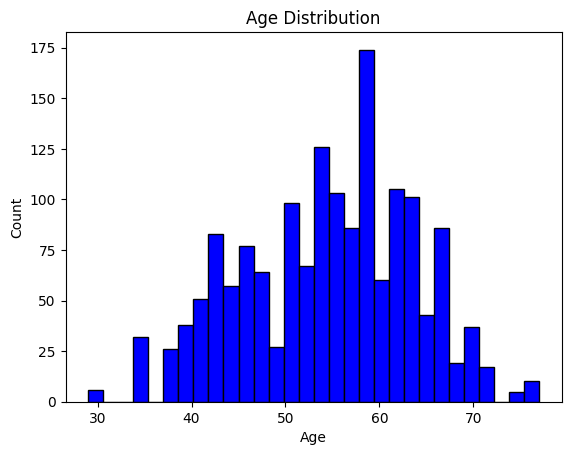

In [ ]:
# Histogram for age
plt.hist(df['Age'], bins=30, edgecolor='black', color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
df['HeartDisease'].value_counts()

Presence    811
Absence     787
Name: HeartDisease, dtype: int64

<ipython-input-10-c283bfdb44d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='Set1')


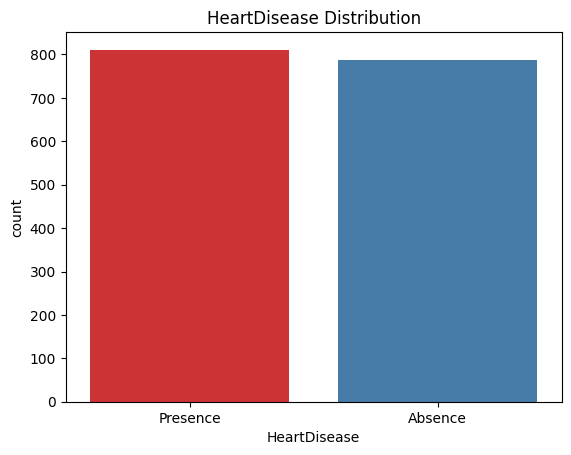

In [ ]:
# Count plots for binary variables
for col in [ 'HeartDisease']:
    sns.countplot(x=col, data=df,palette='Set1')
    plt.title(f'{col} Distribution')
    plt.show()

In [ ]:
#converting labeldata
le = preprocessing.LabelEncoder()
df.HeartDisease = le.fit_transform(df.HeartDisease)
df['HeartDisease'] = le.fit_transform(df['HeartDisease'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   PatientID             1598 non-null   int64
 1   Age                   1598 non-null   int64
 2   Sex                   1598 non-null   int64
 3   Chestpaintype         1598 non-null   int64
 4   BP                    1598 non-null   int64
 5   Cholesterol           1598 non-null   int64
 6   FBSover120            1598 non-null   int64
 7   EKGresults            1598 non-null   int64
 8   MaxHR                 1598 non-null   int64
 9   Exerciseangina        1598 non-null   int64
 10  STdepression          1598 non-null   int64
 11  oldpeak               1598 non-null   int64
 12  SlopeofST             1598 non-null   int64
 13  Numberofvesselsfluro  1598 non-null   int64
 14  Thallium              1598 non-null   int64
 15  HeartDisease          1598 non-null   int64
dtypes: int

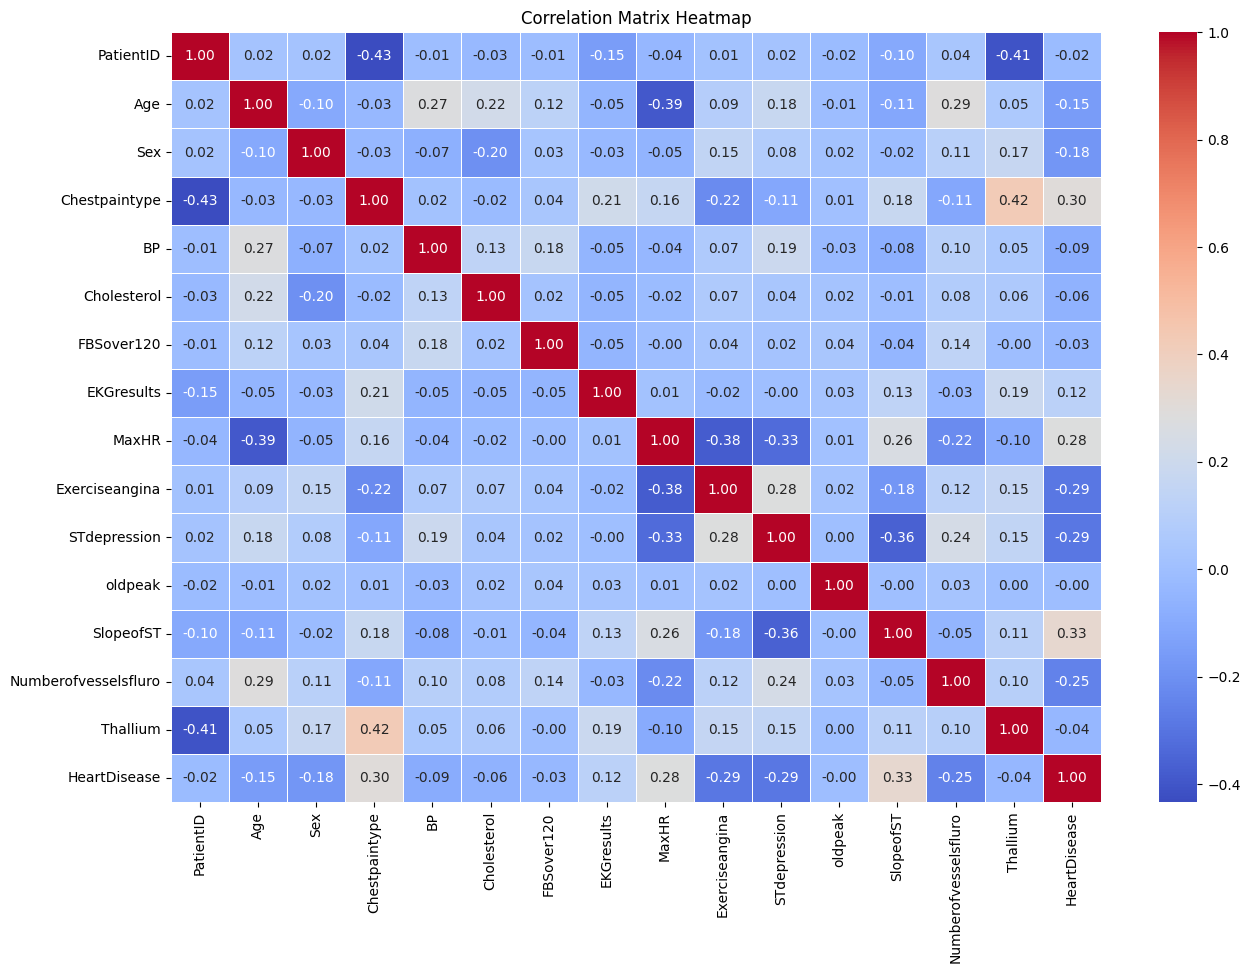

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


# **KNN**

In [ ]:
#splitting dataset to x and y
x = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
y = df.iloc[:,15].values
print(x[0])
print(y[0])

[100000     70      1      4    130    322      0      2    109      0
      2      5      2      3      3]
1


In [ ]:
#X and Y split into train set with 80% and test set with 20% of test size
from sklearn.model_selection import train_test_split
# Intentionally reduce the training dataset size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train[0])
print(x_test[0])

[4693889      56       0       0     200     288       1       0     133
       1       4       3       0       2       3]
[7991574      58       1       0     125     300       0       0     171
       0       0       1       2       2       3]


In [ ]:
# The X samples are normalizing to a common scale
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train[0])
print(x_test[0])

[-0.68537538  0.18490126 -1.52581945 -0.99262483  3.86710846  0.80956534
  2.33549683 -0.91877954 -0.69903559  1.38725813  2.98499168  0.41918304
 -2.26028657  1.23658227  0.19740918]
[ 0.04075248  0.34915352  0.72876641 -1.07049803 -0.33201954  0.99134737
 -0.37796447 -0.98617622  0.9205402  -0.65465367 -0.71214955 -0.68549243
  0.94763096  1.2872627   0.27005058]


In [ ]:
# Now data set is ready to implement classifiers
# KNN- K-value is 5 and metric use here is 'minkowski'
# Training the model with X_train and Y_train with the code 'knnclf.fit'
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7,metric ='minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Trained model is predicting the labels for X_test from KNN
ypred_KNN = knn.predict(x_test)
ypred_KNN

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,

In [ ]:
y_test

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
#length
len(ypred_KNN)
len(y_test)

320

In [ ]:
#no of unmatchings
count=0
for i in range(30):
  if(y_test[i]!=ypred_KNN[i]):
    count=count+1
print(count)

5


In [ ]:
#Calculating the Accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score
knn_ac= accuracy_score(y_test,ypred_KNN)
print(knn_ac)
print(classification_report(y_test, ypred_KNN))

0.859375
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       144
           1       0.87      0.88      0.87       176

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



In [ ]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, ypred_KNN)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[121  23]
 [ 22 154]]


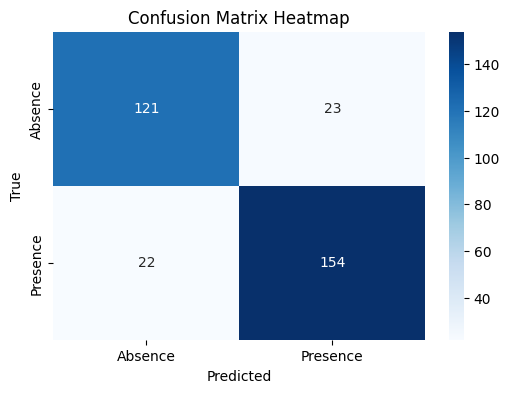

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Absence", "Presence"],
            yticklabels=["Absence", "Presence"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion = "entropy")
#performing training
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#predicting
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [ ]:
count=0
for i in range(30):
  if(y_test[i]!=y_pred[i]):
    count=count+1
print(count)


3


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
clfac= accuracy_score(y_test,y_pred)
print("Accuracy : ", clfac)
print(classification_report(y_test, y_pred))

Accuracy :  0.915625
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       144
           1       0.92      0.93      0.92       176

    accuracy                           0.92       320
   macro avg       0.91      0.91      0.91       320
weighted avg       0.92      0.92      0.92       320



# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
y_test

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
count=0
for i in range(30):
  if(y_test[i]!=y_pred[i]):
    count=count+1
print(count)

8


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
nbac= accuracy_score(y_test,y_pred)
print("Accuracy : ", nbac)
print(classification_report(y_test, y_pred))

Accuracy :  0.734375
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       144
           1       0.75      0.77      0.76       176

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



# **SVM**

In [ ]:
#import svm model
from sklearn import svm
#create a svm classifier
sv=svm.SVC(kernel='poly') #hash kernel
#train the model using the training sets
sv.fit(x_train,y_train)
#predict the response for the test dataset
y_pred = sv.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
y_test

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
svac=accuracy_score(y_test, y_pred)
print("Accuracy : ", svac)
print(classification_report(y_test, y_pred))

Accuracy :  0.903125
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       144
           1       0.91      0.91      0.91       176

    accuracy                           0.90       320
   macro avg       0.90      0.90      0.90       320
weighted avg       0.90      0.90      0.90       320



# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
lrac = accuracy_score(y_test, y_pred)
print("Accuracy : ", lrac)
print(classification_report(y_test, y_pred))

Accuracy :  0.75625
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       144
           1       0.78      0.78      0.78       176

    accuracy                           0.76       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.76      0.76       320



# **ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada= AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

In [ ]:
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [ ]:
y_pred = ada.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score
adaac = accuracy_score(y_test, y_pred)
print("Accuracy : ", adaac)
print(classification_report(y_test, y_pred))

Accuracy :  0.84375
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       144
           1       0.87      0.85      0.86       176

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



# **ANN**


In [ ]:
# Import Library
from sklearn.neural_network import MLPClassifier

# Fitting Model
mlp = MLPClassifier(hidden_layer_sizes=(5), activation = 'relu', solver = 'adam',max_iter= 10000, verbose = True)
mlp = mlp.fit(x_train,y_train)

# Prediction to Test Dataset
y_predmlp = mlp.predict(x_test)

Iteration 1, loss = 0.68919607
Iteration 2, loss = 0.68205460
Iteration 3, loss = 0.67580021
Iteration 4, loss = 0.67000266
Iteration 5, loss = 0.66458206
Iteration 6, loss = 0.65943931
Iteration 7, loss = 0.65474768
Iteration 8, loss = 0.64988723
Iteration 9, loss = 0.64555283
Iteration 10, loss = 0.64125526
Iteration 11, loss = 0.63709691
Iteration 12, loss = 0.63293000
Iteration 13, loss = 0.62888275
Iteration 14, loss = 0.62504515
Iteration 15, loss = 0.62143739
Iteration 16, loss = 0.61795761
Iteration 17, loss = 0.61445761
Iteration 18, loss = 0.61104052
Iteration 19, loss = 0.60778152
Iteration 20, loss = 0.60460846
Iteration 21, loss = 0.60162064
Iteration 22, loss = 0.59852891
Iteration 23, loss = 0.59580658
Iteration 24, loss = 0.59302562
Iteration 25, loss = 0.59020273
Iteration 26, loss = 0.58749840
Iteration 27, loss = 0.58494937
Iteration 28, loss = 0.58241583
Iteration 29, loss = 0.57992214
Iteration 30, loss = 0.57747210
Iteration 31, loss = 0.57505805
Iteration 32, los

In [ ]:
print('Number of Layer =', mlp.n_layers_)
print('Number of Iteration =', mlp.n_iter_)
print('Current loss computed with the loss function =', mlp.loss_)

Number of Layer = 3
Number of Iteration = 596
Current loss computed with the loss function = 0.3004491024600666


In [ ]:
mlpac = metrics.accuracy_score(y_test, y_predmlp)
print("Accuracy : ", mlpac)
print(classification_report(y_test, y_predmlp))

Accuracy :  0.84375
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       144
           1       0.87      0.85      0.86       176

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



# **RANDOM FOREST**

In [ ]:
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=200, max_depth=10)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)


In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [ ]:
y_pred=rfc.predict(x_test)
y_pred


array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
rfcac=accuracy_score(y_test, y_pred)
print("Accuracy : ", rfcac)
print(classification_report(y_test, y_pred))

Accuracy :  0.978125
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       144
           1       0.98      0.98      0.98       176

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



# **CATBOOST CLASSIFIER**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
CAT = CatBoostClassifier(iterations=100,depth=2,learning_rate=1,loss_function='Logloss',verbose=True)

In [ ]:
CAT.fit(x_train,y_train)

0:	learn: 0.5253174	total: 46.4ms	remaining: 4.59s
1:	learn: 0.4742260	total: 46.7ms	remaining: 2.29s
2:	learn: 0.4082588	total: 46.9ms	remaining: 1.52s
3:	learn: 0.4037803	total: 47.3ms	remaining: 1.13s
4:	learn: 0.3878142	total: 47.7ms	remaining: 907ms
5:	learn: 0.3788445	total: 48.1ms	remaining: 753ms
6:	learn: 0.3690805	total: 48.5ms	remaining: 644ms
7:	learn: 0.3498654	total: 48.9ms	remaining: 562ms
8:	learn: 0.3316258	total: 49.3ms	remaining: 498ms
9:	learn: 0.3186395	total: 49.7ms	remaining: 447ms
10:	learn: 0.3080758	total: 50ms	remaining: 405ms
11:	learn: 0.3037203	total: 50.4ms	remaining: 370ms
12:	learn: 0.3007510	total: 50.7ms	remaining: 340ms
13:	learn: 0.2976075	total: 51.2ms	remaining: 314ms
14:	learn: 0.2886619	total: 51.4ms	remaining: 291ms
15:	learn: 0.2869637	total: 51.7ms	remaining: 271ms
16:	learn: 0.2817817	total: 52ms	remaining: 254ms
17:	learn: 0.2757493	total: 52.4ms	remaining: 239ms
18:	learn: 0.2687522	total: 52.8ms	remaining: 225ms
19:	learn: 0.2638691	total

In [ ]:
# accuracy on test data
y_predCAT = CAT.predict(x_test)
y_predCAT

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
CATac = accuracy_score(y_predCAT, y_test)

In [ ]:
print("Accuracy : ", CATac)
print(classification_report(y_test, y_predCAT))

Accuracy :  0.903125
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       144
           1       0.92      0.90      0.91       176

    accuracy                           0.90       320
   macro avg       0.90      0.90      0.90       320
weighted avg       0.90      0.90      0.90       320



In [ ]:
comparison = pd.DataFrame({'Model': ['KNN', 'Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'ADA BOOST', 'ANN', 'Random Forest', 'CatBoost Classifier'],
                        'Accuracy': [knn_ac*100, clfac*100, nbac*100, svac*100, lrac*100,
                                     adaac*100, mlpac*100, rfcac*100, CATac*100]})

comparison.style.hide_index()

<ipython-input-80-42887b979e74>:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  comparison.style.hide_index()


Model,Accuracy
KNN,85.937500
Decision Tree,91.562500
Naive Bayes,73.437500
SVM,90.312500
Logistic Regression,75.625000
ADA BOOST,84.375000
ANN,84.375000
Random Forest,97.812500
CatBoost Classifier,90.312500


<ipython-input-81-a66aa9f122c1>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


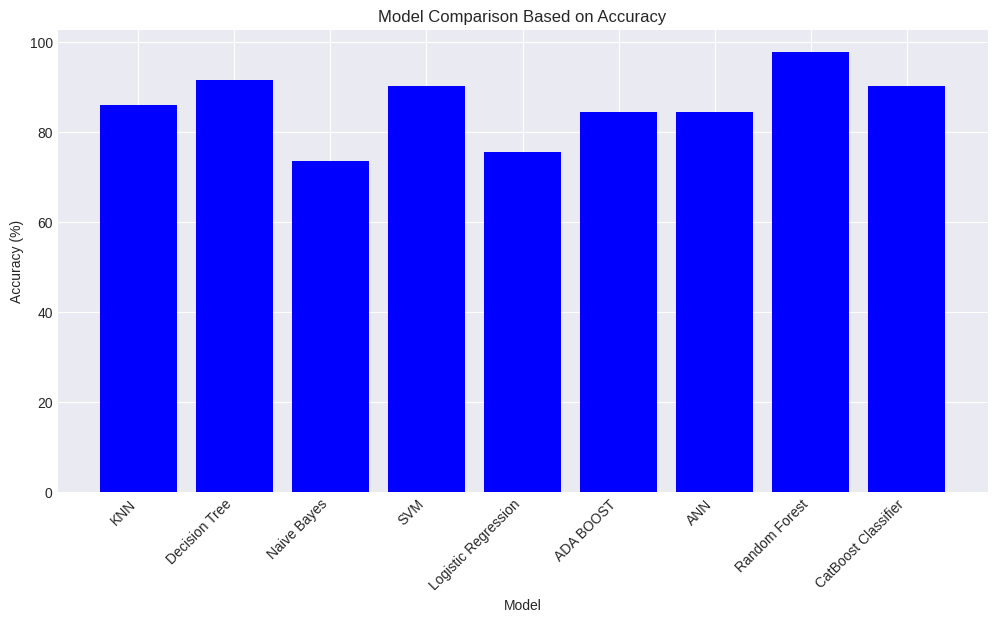

In [ ]:
# Given data for model comparison
comparison_data = {
    'Model': ['KNN', 'Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'ADA BOOST', 'ANN', 'Random Forest', 'CatBoost Classifier'],
    'Accuracy': [	85.937500, 	91.562500, 73.437500, 90.312500, 75.625000, 84.375000, 	84.375000, 97.812500 , 90.312500]
}

# Create a DataFrame
comparison = pd.DataFrame(comparison_data)

# Set up the plotting environment (if using Jupyter or Colab)
plt.style.use('seaborn-darkgrid')

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(comparison['Model'], comparison['Accuracy'], color='blue')

# Adding labels and title
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Model')
ax.set_title('Model Comparison Based on Accuracy')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()